<a href="https://colab.research.google.com/github/zhangou888/NN/blob/main/SHAP_(SHapley_Additive_Explanations)_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP (SHapley Additive exPlanations) Example
**SHAP (SHapley Additive exPlanations)** is a powerful method for explaining the output of machine learning models, based on game theory.

## Key Idea

SHAP assigns **each feature an importance value** for a particular prediction. It answers:

> _“How much did each feature contribute to the final prediction, compared to the average prediction?”_

It's based on Shapley values, which come from cooperative game theory, where you fairly distribute "payout" (model prediction) among "players" (features) depending on their contributions.

## Why Use SHAP?
- Model-agnostic: Works with any ML model (tree-based, neural nets, etc.)

- Local & global explanations: Shows impact of each feature on individual predictions and across the dataset

- Fair and consistent: Mathematically justified


## Simple Example: Predicting House Price

Say we have a model that predicts house prices using these features:
- size (in sq ft)
- location_quality (0–10)
- has_pool (True/False)

## Python Code Example (Using a Tree Model)
###Step-by-Step SHAP Example Using California Housing Dataset
1. Load the data
2. Train an XGBoost regressor
3. Use SHAP to explain one prediction
4. Visualize the explanation

In [5]:
%pip install shap
%pip install xgboost
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install numpy

In [6]:
# Step 1: Import packages
import shap
import xgboost
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Step 2: Load California Housing dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

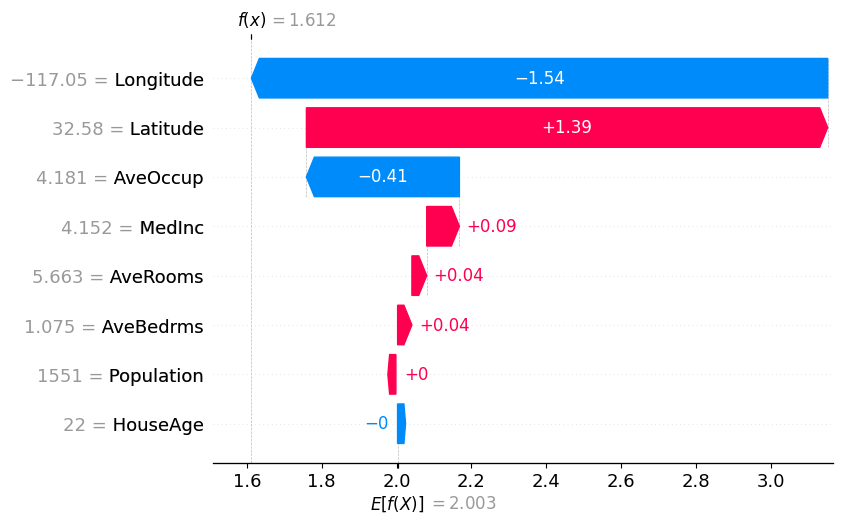

In [7]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 4: Train XGBoost regressor
model = xgboost.XGBRegressor(n_estimators=100, max_depth=4, random_state=0)
model.fit(X_train, y_train)

# Step 5: Create SHAP explainer
explainer = shap.Explainer(model, X_train)

# Step 6: Explain the first prediction in test set
shap_values = explainer(X_test.iloc[:1])

# Step 7: Visualize explanation
shap.plots.waterfall(shap_values[0])

 In the waterfall plot:

- The base value is the average model prediction
- Each feature shows how much it pushed the prediction up or down
- The final bar is the model's prediction for that data point

**Each horizontal bar in the plot shows**:
- The contribution of a specific feature
- Whether it increased (right/red) or decreased (left/blue) the prediction
- The bars are added sequentially from the base value (average prediction) to the final prediction

**In Summary**:
- Positive SHAP value = pushes prediction up
- Negative SHAP value = pushes prediction down
- Sum of all SHAP values + base value = final prediction